## 1. Import the Necessary Packages

Before running the code, make sure you have all the required packages installed.

You can set up a virtual environment and install all dependencies using a `requirements.txt` file

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import warnings as wr
import seaborn as sns
from scipy.stats import skew, skewtest, kurtosis, kurtosistest

wr.filterwarnings('ignore')

## 2. EDA & Understanding our data

In this section, we will perform **Exploratory Data Analysis (EDA)** to:

- Get a sense of the dataset structure
- Identify missing values, data types, and anomalies
- Explore feature distributions and relationships
- Understand class balance and potential data quality issues

In [5]:
test_df = pd.read_csv("../data/SBAcase.11.13.17.csv")
test_df.head(20)

,Selected,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,...,ChgOffPrinGr,GrAppv,SBA_Appv,New,RealEstate,Portion,Recession,daysterm,xx,Default
0,0,1004285007,SIMPLEX OFFICE SOLUTIONS,ANAHEIM,CA,92801,CALIFORNIA BANK & TRUST,CA,532420,15074,...,0,30000,15000,0,0,0.50,0,1080,16175.0,0
1,1,1004535010,DREAM HOME REALTY,TORRANCE,CA,90505,CALIFORNIA BANK & TRUST,CA,531210,15130,...,0,30000,15000,0,0,0.50,1,1680,17658.0,0
2,0,1005005006,"Winset, Inc. dba Bankers Hill",SAN DIEGO,CA,92103,CALIFORNIA BANK & TRUST,CA,531210,15188,...,0,30000,15000,0,0,0.50,0,1080,16298.0,0
3,1,1005535001,Shiva Management,SAN DIEGO,CA,92108,CALIFORNIA BANK & TRUST,CA,531312,15719,...,0,50000,25000,0,0,0.50,0,1080,16816.0,0
4,1,1005996006,"GOLD CROWN HOME LOANS, INC",LOS ANGELES,CA,91345,SBA - EDF ENFORCEMENT ACTION,CO,531390,16840,...,0,343000,343000,0,1,1.00,0,7200,24103.0,0
5,1,1006295003,Ronald Lee Roberts,SACRAMENTO,CA,95831,CALIFORNIA BANK & TRUST,CA,531210,15813,...,0,50000,25000,0,0,0.50,0,2520,18345.0,0
6,0,1015066002,SUPERIOR BROKERS REALTY,HUNTINGTON PARK,CA,90255,U.S. BANK NATIONAL ASSOCIATION,OH,531210,16841,...,247074,297500,223125,0,1,0.75,0,8070,24930.0,1
7,0,1015266003,LIBERTY REALTY CO,LONG BEACH,CA,90808,JPMORGAN CHASE BANK NATL ASSOC,NV,531210,16841,...,0,30000,15000,1,0,0.50,0,2520,19380.0,0
8,0,1018975003,"SOUTHLAND MGT., CO.",SANTA ANA,CA,92704,BANK OF AMERICA NATL ASSOC,NC,531390,16252,...,35333,50000,25000,0,0,0.50,0,660,16943.0,1
9,1,1022515008,"AMR Appraisals, Inc.",SAN RAMON,CA,94583,BANK OF AMERICA NATL ASSOC,NC,531320,16264,...,0,10000,5000,1,0,0.50,0,2520,18834.0,0


### 2.1 Columns Descriptions

Based on the original dataset and available sources, we have the following understanding of each column:<br>
(For more information on the dataset refer to the `README.md` file)

| Variable Name        | Description                                                                 |
|----------------------|-----------------------------------------------------------------------------|
| `LoanNr_ChkDgt`      | Identifier – Primary key                                                    |
| `Name`               | Borrower name                                                               |
| `City`               | Borrower city                                                               |
| `State`              | Borrower state                                                              |
| `Zip`                | Borrower ZIP code                                                           |
| `Bank`               | Bank name                                                                   |
| `BankState`          | Bank state                                                                  |
| `NAICS`              | North American Industry Classification System code                          |
| `ApprovalDate`       | Date SBA commitment was issued                                              |
| `ApprovalFY`         | Fiscal year of loan commitment                                              |
| `Term`               | Loan term in months                                                         |
| `NoEmp`              | Number of business employees                                                |
| `NewExist`           | Business type: 1 = Existing, 2 = New                                        |
| `CreateJob`          | Number of jobs created                                                      |
| `RetainedJob`        | Number of jobs retained                                                     |
| `FranchiseCode`      | Franchise code (`00000` or `00001` = No franchise)                          |
| `UrbanRural`         | 1 = Urban, 2 = Rural, 0 = Undefined                                          |
| `RevLineCr`          | Revolving line of credit (Y = Yes, N = No)                                  |
| `LowDoc`             | LowDoc Loan Program participation (Y = Yes, N = No)                         |
| `ChgOffDate`         | Date when the loan was charged off (if defaulted)                           |
| `DisbursementDate`   | Date when the loan funds were disbursed                                     |
| `DisbursementGross`  | Amount disbursed to the borrower                                            |
| `BalanceGross`       | Gross amount outstanding                                                    |
| `MIS_Status`         | Loan status: CHGOFF (Charged off) or PIF (Paid in full)                     |
| `ChgOffPrinGr`       | Amount of principal charged off                                             |
| `GrAppv`             | Gross amount of loan approved by the bank                                   |
| `SBA_Appv`           | Portion of the loan guaranteed by the SBA                                   |
| `New`                | 1 if NewExist = 2 (New business), 0 if NewExist = 1 (Existing business)     |
| `Portion`            | Proportion of the loan guaranteed by the SBA                                |
| `RealEstate`         | 1 if the loan is backed by real estate, 0 otherwise                         |
| `Recession`          | 1 if the loan was active during the Great Recession, 0 otherwise            |
| `Selected`           | 1 if selected for training, 0 if selected for testing (assignment split)    |
| `Default`            | 1 if the loan was charged off (defaulted), 0 if paid in full                |
| `daysterm`           | Loan term in days (used in recession-related calculations)                  |
| `xx`                 | Extra variable created for recession feature generation                     |

### 2.2 Data Types and Missing Values

In [6]:
print(f"Shape of the dataset: {test_df.shape} \nDataset information:")
print(test_df.info())

Shape of the dataset: (2102, 35) 
Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2102 entries, 0 to 2101
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Selected           2102 non-null   int64  
 1   LoanNr_ChkDgt      2102 non-null   int64  
 2   Name               2102 non-null   object 
 3   City               2102 non-null   object 
 4   State              2102 non-null   object 
 5   Zip                2102 non-null   int64  
 6   Bank               2099 non-null   object 
 7   BankState          2099 non-null   object 
 8   NAICS              2102 non-null   int64  
 9   ApprovalDate       2102 non-null   int64  
 10  ApprovalFY         2102 non-null   int64  
 11  Term               2102 non-null   int64  
 12  NoEmp              2102 non-null   int64  
 13  NewExist           2101 non-null   float64
 14  CreateJob          2102 non-null   int64  
 15  RetainedJob      

Most of the data types are either `float64` or `int64`, but there are 8 that are `object` types with which we probably have to deal with in order to do a precise selecting of model building variables.<br>
The usual tendency is that a column has 0 null values, which shows good data consistency, but what stands out from the rest is the **ChgOffDate** column that has 697 non-null values out of the 2102. <br>
Upon closer inspection and previous dataset knowledge, we know that this column only has information if the loan was defaulted and it was written off in the books of the loaner. Nonetheless, we will have to deal with this inconsistency.



### 2.3 Data Cleaning and Pre-processing for EDA

Before performing Exploratory Data Analysis (EDA), it is crucial to clean and preprocess the dataset to ensure the analysis is accurate and meaningful and our test do not fail.

In [7]:
test_df[test_df['ChgOffDate'].isna()]

,Selected,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,...,ChgOffPrinGr,GrAppv,SBA_Appv,New,RealEstate,Portion,Recession,daysterm,xx,Default
0,0,1004285007,SIMPLEX OFFICE SOLUTIONS,ANAHEIM,CA,92801,CALIFORNIA BANK & TRUST,CA,532420,15074,...,0,30000,15000,0,0,0.50,0,1080,16175.0,0
1,1,1004535010,DREAM HOME REALTY,TORRANCE,CA,90505,CALIFORNIA BANK & TRUST,CA,531210,15130,...,0,30000,15000,0,0,0.50,1,1680,17658.0,0
2,0,1005005006,"Winset, Inc. dba Bankers Hill",SAN DIEGO,CA,92103,CALIFORNIA BANK & TRUST,CA,531210,15188,...,0,30000,15000,0,0,0.50,0,1080,16298.0,0
3,1,1005535001,Shiva Management,SAN DIEGO,CA,92108,CALIFORNIA BANK & TRUST,CA,531312,15719,...,0,50000,25000,0,0,0.50,0,1080,16816.0,0
4,1,1005996006,"GOLD CROWN HOME LOANS, INC",LOS ANGELES,CA,91345,SBA - EDF ENFORCEMENT ACTION,CO,531390,16840,...,0,343000,343000,0,1,1.00,0,7200,24103.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2097,1,9893874006,MEGA VIDEO & WIRELESS HIGHLAND,HIGHLAND,CA,92346,UNITI BANK,CA,532230,16838,...,0,150000,75000,1,0,0.50,0,1800,18691.0,0
2098,1,9901143004,MOVING CONNECTION & CARL'S TRA,EL CAJON,CA,92021,ZIONS FIRST NATIONAL BANK,UT,532120,13530,...,0,99000,79200,0,1,0.80,0,9000,22545.0,0
2099,0,9903293007,"A.J. STUDIO RENTALS, INC.",CAMARILLO,CA,93012,CITY NATIONAL BANK,CA,532120,13531,...,0,50000,40000,0,0,0.80,0,2520,16124.0,0
2100,1,9925643006,TAHOE MOTION PICTURE RENTALS,SUN VALLEY,CA,91352,CITY NATIONAL BANK,CA,532120,13542,...,0,500000,375000,0,0,0.75,0,3600,17265.0,0


The column `ChgOffDate` is only present when a loan has defaulted. Including this column in the model would heavily influence the prediction of the target variable (`y`), because it essentially gives away the answer.

Since `ChgOffDate` is **only filled in after a default**, its presence directly signals that the loan has already defaulted. This leads to **target leakage**, where the model learns from information that would not be available at prediction time.

In real-world use, when predicting whether a new loan will default, `ChgOffDate` will always be missing—because the loan has not defaulted yet. Keeping this column in the training data would cause the model to rely on a feature that will never be available in production, resulting in unrealistic and misleading predictions.

In [8]:
test_df = test_df.drop(columns='ChgOffDate')

In [9]:
test_df.isnull().sum()

Selected             0
LoanNr_ChkDgt        0
Name                 0
City                 0
State                0
Zip                  0
Bank                 3
BankState            3
NAICS                0
ApprovalDate         0
ApprovalFY           0
Term                 0
NoEmp                0
NewExist             1
CreateJob            0
RetainedJob          0
FranchiseCode        0
UrbanRural           0
RevLineCr            2
LowDoc               3
DisbursementDate     3
DisbursementGross    0
BalanceGross         0
MIS_Status           0
ChgOffPrinGr         0
GrAppv               0
SBA_Appv             0
New                  0
RealEstate           0
Portion              0
Recession            0
daysterm             0
xx                   3
Default              0
dtype: int64

We will drop rows with missing values since we can't replacate them and there is not much data that will be missing

In [10]:
test_df.dropna()

,Selected,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,...,ChgOffPrinGr,GrAppv,SBA_Appv,New,RealEstate,Portion,Recession,daysterm,xx,Default
0,0,1004285007,SIMPLEX OFFICE SOLUTIONS,ANAHEIM,CA,92801,CALIFORNIA BANK & TRUST,CA,532420,15074,...,0,30000,15000,0,0,0.50,0,1080,16175.0,0
1,1,1004535010,DREAM HOME REALTY,TORRANCE,CA,90505,CALIFORNIA BANK & TRUST,CA,531210,15130,...,0,30000,15000,0,0,0.50,1,1680,17658.0,0
2,0,1005005006,"Winset, Inc. dba Bankers Hill",SAN DIEGO,CA,92103,CALIFORNIA BANK & TRUST,CA,531210,15188,...,0,30000,15000,0,0,0.50,0,1080,16298.0,0
3,1,1005535001,Shiva Management,SAN DIEGO,CA,92108,CALIFORNIA BANK & TRUST,CA,531312,15719,...,0,50000,25000,0,0,0.50,0,1080,16816.0,0
4,1,1005996006,"GOLD CROWN HOME LOANS, INC",LOS ANGELES,CA,91345,SBA - EDF ENFORCEMENT ACTION,CO,531390,16840,...,0,343000,343000,0,1,1.00,0,7200,24103.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2096,0,9893714004,HOLLYWOOD TENTWORKS INC,PACOIMA,CA,91331,SBA - EDF ENFORCEMENT ACTION,CO,532310,16838,...,0,1029000,1029000,0,1,1.00,0,7200,24103.0,0
2097,1,9893874006,MEGA VIDEO & WIRELESS HIGHLAND,HIGHLAND,CA,92346,UNITI BANK,CA,532230,16838,...,0,150000,75000,1,0,0.50,0,1800,18691.0,0
2098,1,9901143004,MOVING CONNECTION & CARL'S TRA,EL CAJON,CA,92021,ZIONS FIRST NATIONAL BANK,UT,532120,13530,...,0,99000,79200,0,1,0.80,0,9000,22545.0,0
2099,0,9903293007,"A.J. STUDIO RENTALS, INC.",CAMARILLO,CA,93012,CITY NATIONAL BANK,CA,532120,13531,...,0,50000,40000,0,0,0.80,0,2520,16124.0,0


### 2.4 Dataset Description
After cleaning up the data a little bit in order to observe any patterns and tendencies in the data, we need to generate a basic **descriptive summary** of the dataset.

In [11]:
desc = test_df.describe()
desc.loc['median'] = test_df.median(numeric_only=True)
stats_order = ['count', 'mean', 'median', 'std', 'min', '25%', '50%', '75%', 'max']
desc = desc.reindex(stats_order)
desc

,Selected,LoanNr_ChkDgt,Zip,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,...,ChgOffPrinGr,GrAppv,SBA_Appv,New,RealEstate,Portion,Recession,daysterm,xx,Default
count,2102.000000,2.102000e+03,2102.000000,2102.000000,2102.000000,2102.000000,2102.000000,2102.000000,2101.000000,2102.000000,...,2.102000e+03,2.102000e+03,2.102000e+03,2102.000000,2102.000000,2102.000000,2102.000000,2102.000000,2099.000000,2102.000000
mean,0.500000,4.469172e+09,92698.612274,531630.902950,16179.587060,2004.035680,126.980495,10.150809,1.153736,2.549952,...,2.002908e+04,2.330641e+05,1.891759e+05,0.154139,0.274500,0.671055,0.068506,3809.414843,20076.896141,0.326356
median,0.500000,3.621730e+09,92559.500000,531312.000000,16556.000000,2005.000000,84.000000,3.000000,1.000000,0.000000,...,0.000000e+00,6.100000e+04,4.168000e+04,0.000000,0.000000,0.500000,0.000000,2520.000000,19270.000000,0.000000
std,0.500119,2.530069e+09,1878.208435,521.836986,1454.931276,4.006321,93.798944,34.402420,0.362099,8.010175,...,7.543229e+04,3.436310e+05,2.989268e+05,0.361168,0.446368,0.186519,0.252673,2813.968318,2854.510377,0.468991
min,0.000000,1.004285e+09,65757.000000,531110.000000,10554.000000,1989.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,4.500000e+03,2.250000e+03,0.000000,0.000000,0.296770,0.000000,0.000000,11524.000000,0.000000
25%,0.000000,2.392978e+09,91402.000000,531210.000000,15695.750000,2003.000000,60.000000,2.000000,1.000000,0.000000,...,0.000000e+00,3.000000e+04,1.500000e+04,0.000000,0.000000,0.500000,0.000000,1800.000000,18316.500000,0.000000
50%,0.500000,3.621730e+09,92559.500000,531312.000000,16556.000000,2005.000000,84.000000,3.000000,1.000000,0.000000,...,0.000000e+00,6.100000e+04,4.168000e+04,0.000000,0.000000,0.500000,0.000000,2520.000000,19270.000000,0.000000
75%,1.000000,6.551607e+09,94127.750000,532230.000000,17149.750000,2007.000000,240.000000,8.000000,1.000000,2.000000,...,1.507350e+04,3.000000e+05,2.397562e+05,0.000000,1.000000,0.850000,0.000000,7200.000000,22335.000000,1.000000
max,1.000000,9.958873e+09,96161.000000,533110.000000,18911.000000,2012.000000,306.000000,650.000000,2.000000,130.000000,...,1.509550e+06,2.350000e+06,2.115000e+06,1.000000,1.000000,1.000000,1.000000,9180.000000,27598.000000,1.000000


### 2.5 Visualization & Transforming

To better understand our data we will some of them to see if they would be good variables


In [12]:
test_df.dtypes

Selected               int64
LoanNr_ChkDgt          int64
Name                  object
City                  object
State                 object
Zip                    int64
Bank                  object
BankState             object
NAICS                  int64
ApprovalDate           int64
ApprovalFY             int64
Term                   int64
NoEmp                  int64
NewExist             float64
CreateJob              int64
RetainedJob            int64
FranchiseCode          int64
UrbanRural             int64
RevLineCr             object
LowDoc                object
DisbursementDate     float64
DisbursementGross      int64
BalanceGross           int64
MIS_Status            object
ChgOffPrinGr           int64
GrAppv                 int64
SBA_Appv               int64
New                    int64
RealEstate             int64
Portion              float64
Recession              int64
daysterm               int64
xx                   float64
Default                int64
dtype: object

Before visualaizing the data we have to deal with the object data types so that we can iterate through all of the columns

In [27]:
print(test_df[['MIS_Status', 'RevLineCr', 'LowDoc']].head(5))
print(test_df['RevLineCr'].unique())
print(test_df['LowDoc'].unique())
print(test_df['MIS_Status'].unique())


  MIS_Status RevLineCr LowDoc
0      P I F         1      0
1      P I F         1      0
2      P I F         1      0
3      P I F         1      0
4      P I F         0      0
[1 0 nan]
[0 1 nan]
['P I F' 'CHGOFF']


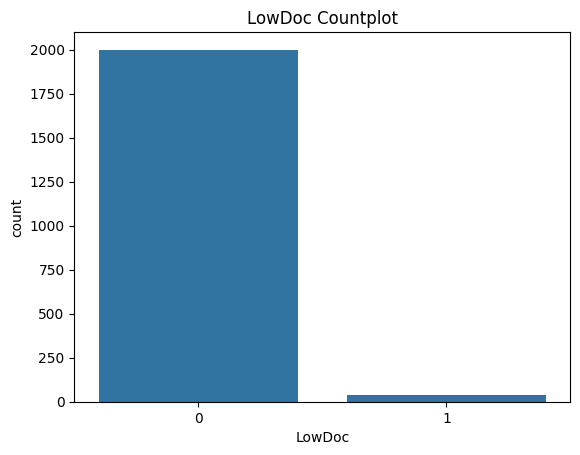

LowDoc
0    2000
1      41
Name: count, dtype: int64

In [26]:
sns.countplot(data=test_df, x='LowDoc')
plt.title('LowDoc Countplot')
plt.show()
test_df['LowDoc'].value_counts()

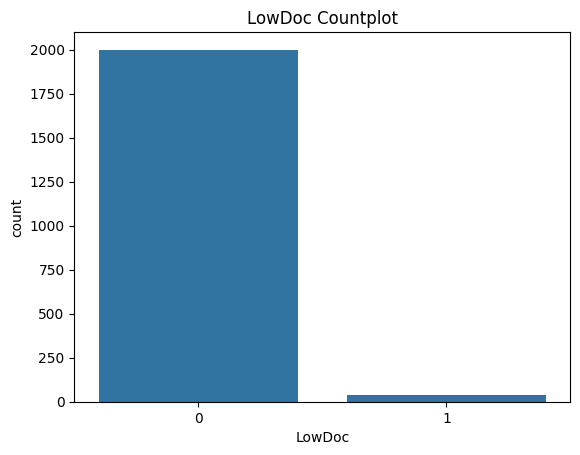

LowDoc
0    2000
1      41
Name: count, dtype: int64

In [25]:
test_df['LowDoc'] = np.where(test_df['LowDoc'] == 'Y', 1 , test_df['LowDoc'])
test_df['LowDoc'] = np.where(test_df['LowDoc'] == 'N', 0 , test_df['LowDoc'])
test_df['LowDoc'] = np.where(test_df['LowDoc'] == '0', 0 , test_df['LowDoc'])
test_df = test_df[~test_df['LowDoc'].isin(['S', 'A'])]
sns.countplot(data=test_df, x='LowDoc')
plt.title('LowDoc Countplot')
plt.show()
test_df['LowDoc'].value_counts()

I cleared up the LowDoc not on to RevLineCr column

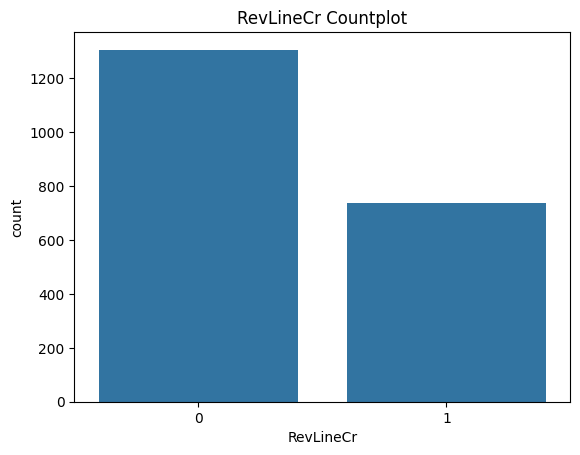

RevLineCr
0    1306
1     736
Name: count, dtype: int64

In [23]:
sns.countplot(data=test_df, x='RevLineCr')
plt.title('RevLineCr Countplot')
plt.show()
test_df['RevLineCr'].value_counts()

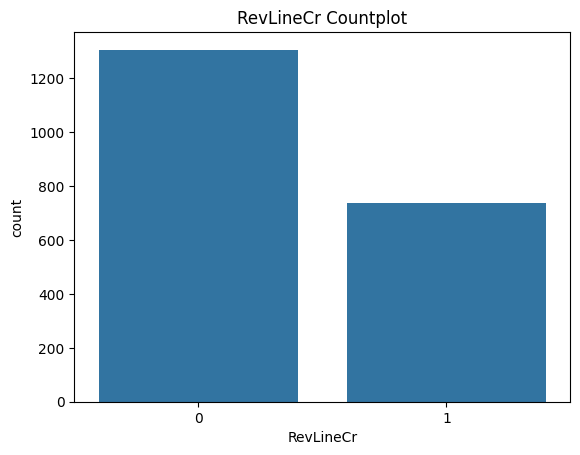

RevLineCr
0    1306
1     736
Name: count, dtype: int64

In [24]:
test_df['RevLineCr'] = np.where(test_df['RevLineCr'] == 'Y', 1 , test_df['RevLineCr'])
test_df['RevLineCr'] = np.where(test_df['RevLineCr'] == 'N', 0 , test_df['RevLineCr'])
test_df['RevLineCr'] = np.where(test_df['RevLineCr'] == '0', 0 , test_df['RevLineCr'])
test_df = test_df[~test_df['RevLineCr'].isin(['T'])]
sns.countplot(data=test_df, x='RevLineCr')
plt.title('RevLineCr Countplot')
plt.show()
test_df['RevLineCr'].value_counts()

Skewness 0.000
z-pointvalue: 1.001
P-value: 0.317

Kurtois 0.000
z-pointvalue: 86.667
P-value: 0.000
Skewness 0.530
z-pointvalue: 9.368
P-value: 0.000

Kurtois 0.530
z-pointvalue: -23.411
P-value: 0.000


TypeError: unsupported operand type(s) for /: 'str' and 'int'

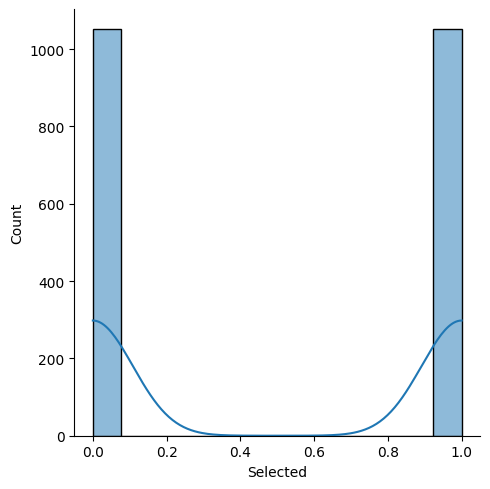

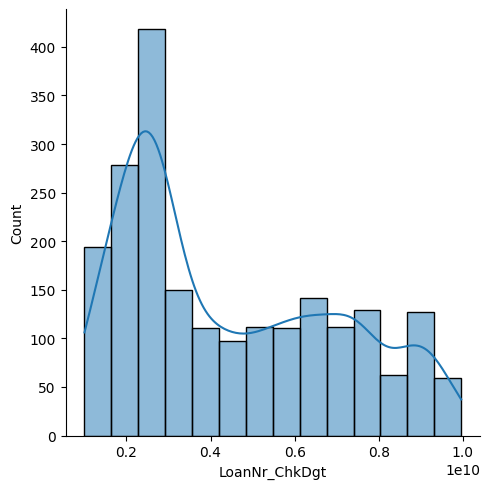

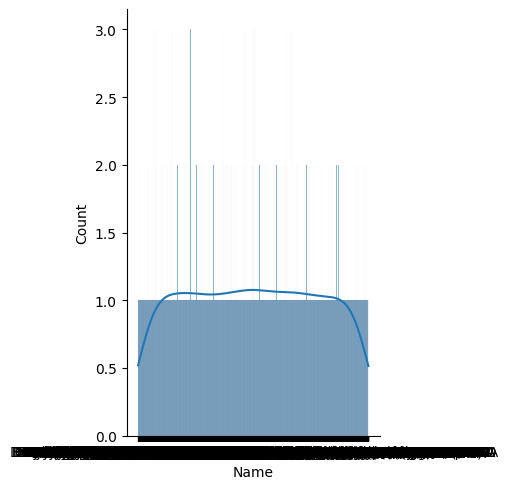

In [ ]:
for column_name in test_df.drop(columns=['Bank', 'BankState', 'State', 'City', 'Name']).columns:
    sns.displot(test_df, x=column_name, kde = True)
    row_var = test_df[column_name]
    f = skew(row_var)
    zpoint, p_value = skewtest(row_var)
    print(f"Skewness {f:.3f}\nz-pointvalue: {zpoint:.3f}\nP-value: {p_value:.3f}\n")
    c = kurtosis(row_var)
    zpoint, p_value = kurtosistest(row_var)
    print(f"Kurtois {f:.3f}\nz-pointvalue: {zpoint:.3f}\nP-value: {p_value:.3f}")

Skewness 7.809
z-pointvalue: 45.464
P-value: 0.000

Kurtois 7.809
z-pointvalue: 28.502
P-value: 0.000


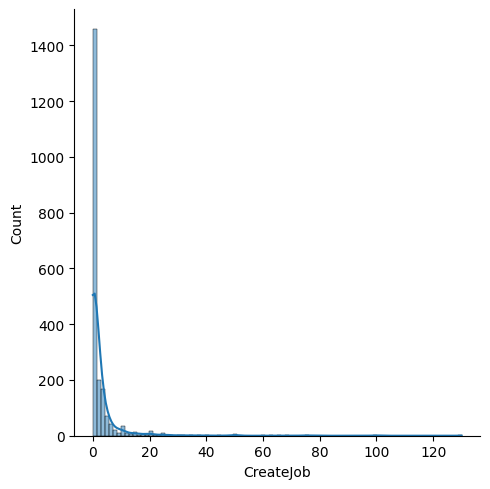

In [25]:
sns.displot(test_df, x='CreateJob', kde = True)
row_var = test_df['CreateJob']
f = skew(row_var)
zpoint, p_value = skewtest(row_var)
print(f"Skewness {f:.3f}\nz-pointvalue: {zpoint:.3f}\nP-value: {p_value:.3f}\n")
c = kurtosis(row_var)
zpoint, p_value = kurtosistest(row_var)
print(f"Kurtois {f:.3f}\nz-pointvalue: {zpoint:.3f}\nP-value: {p_value:.3f}")